# Polynomial Magic

## Showing how to get whatever radius you like from a single set of pseudo data. 

Testing whether from a single randomly generated set of data one can always find the proton radius you want if you look hard enough.

code outline

* generate ONE set of equal spaced random data with 1000 points from 0.01 to 10 fm$^{-2}$ using standard dipole and 0.003 random errors
* ask user to pick a proton radius from 0.70 to 0.92 fm
* loop over polynomial functions to see if we find the result we want
* it fails, drop one low q2 data point and try again
* repeat until we find at polynomial that will give the answer we want

bonus code

* float the normalizing of the "rejected" low q2 data and then show all the data now gives a great fit

In [1]:

import numpy as np
import sys
import matplotlib.pyplot as plt
from lmfit import Model,Parameters

def sd(q2):
    return (1+q2/18.27)**(-2)

#def dd(q2):
#    return (1+0.1176/2*q2)**(-2)


min=0;max=1000
theq2=np.linspace(0.01,10,max)
thedata=sd(theq2)+0.003*np.random.randn(max)

cpq2=theq2
cpdata=thedata

theq2=theq2[min:max]
thedata=thedata[min:max]

seed=2018
np.random.seed(seed)

print('I have created ONE set of psuedo data using standard dipole with the random seed set to',seed,'.')

I have created ONE set of psuedo data using standard dipole with the random seed set to 2018 .


In [2]:
# Type in the proton radius you want to get in fm.
radius = input("Please pick a proton radius between 0.7 and 0.92 fm: ")

Please pick a proton radius between 0.7 and 0.92 fm: 0.9


In [3]:
#radius=0.77
deltaradius=0.01

radius=float(radius)

yourslope=-1*float(radius)**2/6 # 
deltaslope=yourslope+1*(radius+deltaradius)**2/6 # 
print("That radius is equal to a slope of: ",yourslope)
print("\n")
print("I will now find your radius within 0.01 fm of your value.")
print("i.e. a slope of {0:0.4f} +/- {1:0.4f}.".format(yourslope,deltaslope))

print("\n")

import sys
import matplotlib.pyplot as plt
from lmfit import Model,Parameters

def poly(q2,**N):
    p=0
    for n in range(len(N)):
        p+=q2**n*N['a'+str(n)]
    return p

def theparams(N):
    fit_params2 = Parameters()
    for n in range(N+1):
        if n==0:
            fit_params2.add('a'+str(n),  value= 1.00)
        if n==1: 
            fit_params2.add('a'+str(n),  value= yourslope)
        if n!=0 and n!=1:
            fit_params2.add('a'+str(n),  value= 0.00)
    return fit_params2

#print(theparams(10))

tries=0

N=3
model=Model(poly)
result=model.fit(thedata,q2=theq2,params=theparams(N),weights=1/0.003)

while min < 500:
    if tries > 0:
        theq2=theq2[1:max]
        thedata=thedata[1:max]
    #print(len(theq2))
    N=3
    while np.abs(result.best_values['a1']/result.best_values['a0']-yourslope)>deltaslope:
        print('.',end='')
        N+=1
        tries+=1
        model=Model(poly)
        result=model.fit(thedata,q2=theq2,params=theparams(N),weights=1/0.003)
        #print(result.best_values['a1'])
        if N == 17:
            #print('oh, I need to change the Q2 range')
            break
    if N <= 12:
        print("")
        print("")
        break
        #min=np.inf
    else:
        min+=1

#N-=1

print('Found your radius using ', len(thedata), 'data points')

That radius is equal to a slope of:  -0.135


I will now find your radius within 0.01 fm of your value.
i.e. a slope of -0.1350 +/- 0.0030.


...............................................................................................................................................................................................................................................................................................................................................................................................................................

Found your radius using  971 data points


Now I get to use my floating normalization on the low Q2 data and I will then refit with a 12th order poly.

Simple float the normaliztion of the orange points and then merge them back into the rest of the set.
0.9939870609597367


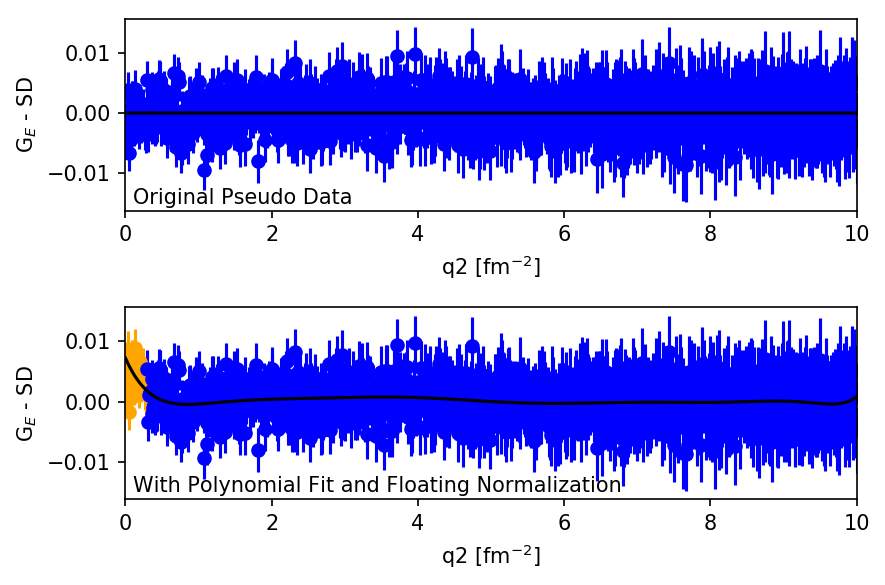

In [4]:
#result.plot()
#plt.xlabel('q2 [fm$^{-2}]')
#plt.ylabel('G$_E$')
#plt.show()
#print(result.fit_report())

oq2=cpq2[0:min]
odata=cpdata[0:min]

plt.figure(dpi=150)
plt.subplot(2,1,1)
plt.errorbar(oq2,odata-sd(oq2),0.003/sd(oq2),fmt='o',color='blue')
plt.errorbar(theq2,thedata-sd(theq2),0.003/sd(theq2),fmt='o',color='blue')
fullq2=np.linspace(0,10.4,10000)
#plt.plot(fullq2,poly(fullq2,**result.best_values)-sd(fullq2),ms=2,zorder=11)
plt.plot(fullq2,fullq2*0,zorder=12,color='black')
plt.xlabel('q2 [fm$^{-2}$]')
plt.ylabel('G$_E$ - SD')
plt.xlim(0,10)
plt.annotate('Original Pseudo Data',xy=[0.1,-0.015])
#plt.show()

# Even Better Let's Just "Float The Normalization!

print("Now I get to use my floating normalization on the low Q2 data and I will then refit with a 12th order poly.")
print("")
print("Simple float the normaliztion of the orange points and then merge them back into the rest of the set.")

def norm(q2,n0):
    return n0*poly(q2,**result.best_values)

print(norm(0.1,1))

model=Model(norm)
normfit=model.fit(odata,q2=oq2,n0=1)

floatdata=odata/(normfit.best_values['n0'])

#plt.subplot(3,1,2)
#plt.errorbar(oq2,floatdata-sd(oq2),0.003/sd(oq2),fmt='o',color='orange')
#plt.errorbar(theq2,thedata-sd(theq2),0.003/sd(theq2),fmt='o',color='blue')
#fullq2=np.linspace(0,10.4,10000)
#plt.plot(fullq2,poly(fullq2,**result.best_values)-sd(fullq2),zorder=11)
#plt.plot(fullq2,fullq2*0,zorder=12,color='black')
#plt.xlabel('q2 [fm$^{-2}$]')
#plt.ylabel('G$_E$ - SD')
#plt.xlim(0,10)

plt.subplot(2,1,2)
plt.errorbar(oq2,floatdata-sd(oq2),0.003/sd(oq2),fmt='o',color='orange')
plt.errorbar(theq2,thedata-sd(theq2),0.003/sd(theq2),fmt='o',color='blue')
fullq2=np.linspace(0,10.4,10000)
plt.plot(fullq2,poly(fullq2,**result.best_values)-sd(fullq2),zorder=11,color='black')
plt.xlabel('q2 [fm$^{-2}$]')
plt.ylabel('G$_E$ - SD')
plt.xlim(0,10)
plt.annotate('With Polynomial Fit and Floating Normalization',xy=[0.1,-0.015],color='black')
plt.tight_layout()
plt.show()

If you now see the renormalized data set it is a nearly perfect fit.
29
1000
1000


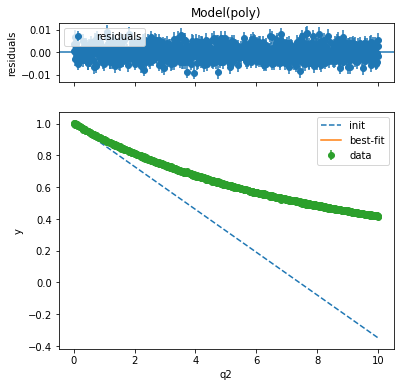

[[Model]]
    Model(poly)
[[Fit Statistics]]
    # function evals   = 30
    # data points      = 1000
    # variables        = 13
    chi-square         = 976.427
    reduced chi-square = 0.989
    Akaike info crit   = 2.145
    Bayesian info crit = 65.946
[[Variables]]
    a0:    1.00619236 +/- 0.001155 (0.11%) (init= 1)
    a1:   -0.12996257 +/- 0.009415 (7.24%) (init=-0.135)
    a2:    0.03352766 +/- 0.026244 (78.28%) (init= 0)
    a3:   -0.01515348 +/- 0.035737 (235.84%) (init= 0)
    a4:    0.00462734 +/- 0.028270 (610.95%) (init= 0)
    a5:   -0.00065718 +/- 0.014214 (2163.00%) (init= 0)
    a6:   -2.4176e-05 +/- 0.004763 (19703.43%) (init= 0)
    a7:    2.1606e-05 +/- 0.001086 (5030.86%) (init= 0)
    a8:   -2.2931e-06 +/- 0.000169 (7382.45%) (init= 0)
    a9:   -8.7064e-08 +/- 1.77e-05 (20309.33%) (init= 0)
    a10:   3.5556e-08 +/- 1.18e-06 (3327.49%) (init= 0)
    a11:  -2.6780e-09 +/- 4.58e-08 (1709.55%) (init= 0)
    a12:   6.8685e-11 +/- 7.78e-10 (1133.38%) (init= 0)
[[Co

In [5]:
print('If you now see the renormalized data set it is a nearly perfect fit.')# Now what happens when you fit this "new" data.

#print(len(cpdata))
#print(len(floatdata))
print(min)
#magicdata=floatdata
magicdata=np.append(floatdata,cpdata[min:])

#magicq2=oq2
magicq2=np.append(oq2,cpq2[min:])

print(len(magicdata))
print(len(magicq2))
#N=11

model=Model(poly)
themagic=model.fit(magicdata,q2=magicq2,params=theparams(N),weights=1/0.003)

themagic.plot()
plt.show()

print(themagic.fit_report())